In [2]:
# icecube_data.ipynb
# Authors: Stephan Meighen-Berger
# Incorporates the IceCube 10 year data release

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import pickle
import csv
from iminuit import Minuit
from scipy.interpolate import UnivariateSpline

In [4]:
# picture path
PICS = '../pics/'

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [6]:
# Plotting standards
std_size = 6.
fontsize = 20.
lw=1.
h_length=1.
mark_s = 10
# params
mag_fit = 1.
colors = ['#fef0d9', '#fdcc8a', '#fc8d59', '#e34a33', '#b30000']
alphas = [0.2, 0.4, 0.6, 0.8, 1.]
# labels_mass = ['1\;TeV', '100\;TeV', '10\;PeV', '30\;TeV']
linest = ['-', '--', '-.', ':']

In [7]:
# Constants
minutes = 60.
days = 60. * 24

In [8]:
def ice_parser(filename):
    store = []
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row_num, row in enumerate(reader):
            if row_num == 0:
                continue
            store.append(row[0].split())
    store = np.array(store, dtype=float)
    return store
# log10(E_nu/GeV)_min, log10(E_nu/GeV)_max, Dec_nu_min[deg], Dec_nu_max[deg], A_Eff[cm^2]
eff_areas = [
    '../data/icecube_10year_ps/irfs/IC40_effectiveArea.csv',
    '../data/icecube_10year_ps/irfs/IC59_effectiveArea.csv',
    '../data/icecube_10year_ps/irfs/IC79_effectiveArea.csv',
    '../data/icecube_10year_ps/irfs/IC86_I_effectiveArea.csv',
    '../data/icecube_10year_ps/irfs/IC86_II_effectiveArea.csv',
]
eff_dic = {
    0: ice_parser(eff_areas[0]),
    1: ice_parser(eff_areas[1]),
    2: ice_parser(eff_areas[2]),
    3: ice_parser(eff_areas[3]),
    4: ice_parser(eff_areas[4]),
    5: ice_parser(eff_areas[4]),
    6: ice_parser(eff_areas[4]),
    7: ice_parser(eff_areas[4]),
    8: ice_parser(eff_areas[4]),
    9: ice_parser(eff_areas[4]),
}

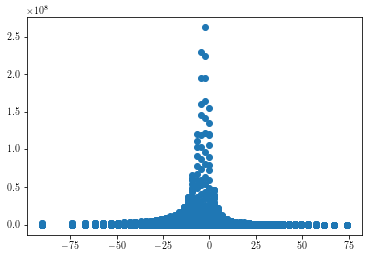

In [9]:
plt.scatter(eff_dic[0][:, 2], eff_dic[0][:, -1])

In [10]:
# MJD, log10(E/GeV), AngErr[deg], RA[deg], Dec[deg], Azimuth[deg], Zenith[deg]
data_sets = [
    '../data/icecube_10year_ps/events/IC40_exp.csv',
    '../data/icecube_10year_ps/events/IC59_exp.csv',
    '../data/icecube_10year_ps/events/IC79_exp.csv',
    '../data/icecube_10year_ps/events/IC86_I_exp.csv',
    '../data/icecube_10year_ps/events/IC86_II_exp.csv',
    '../data/icecube_10year_ps/events/IC86_III_exp.csv',
    '../data/icecube_10year_ps/events/IC86_IV_exp.csv',
    '../data/icecube_10year_ps/events/IC86_V_exp.csv',
    '../data/icecube_10year_ps/events/IC86_VI_exp.csv',
    '../data/icecube_10year_ps/events/IC86_VII_exp.csv',
]
event_dic = {
    0: ice_parser(data_sets[0]),
    1: ice_parser(data_sets[1]),
    2: ice_parser(data_sets[2]),
    3: ice_parser(data_sets[3]),
    4: ice_parser(data_sets[4]),
    5: ice_parser(data_sets[5]),
    6: ice_parser(data_sets[6]),
    7: ice_parser(data_sets[7]),
    8: ice_parser(data_sets[8]),
    9: ice_parser(data_sets[9]),
}

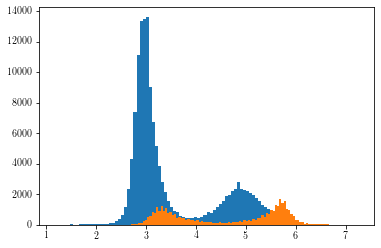

In [11]:
counts1 = plt.hist(event_dic[9][:, 1], bins=100)
counts2 = plt.hist(event_dic[0][:, 1], bins=100)

In [12]:
# MJD, log10(E/GeV), AngErr[deg], RA[deg], Dec[deg], Azimuth[deg], Zenith[deg]
uptime_sets = [
    '../data/icecube_10year_ps/uptime/IC40_exp.csv',
    '../data/icecube_10year_ps/uptime/IC59_exp.csv',
    '../data/icecube_10year_ps/uptime/IC79_exp.csv',
    '../data/icecube_10year_ps/uptime/IC86_I_exp.csv',
    '../data/icecube_10year_ps/uptime/IC86_II_exp.csv',
    '../data/icecube_10year_ps/uptime/IC86_III_exp.csv',
    '../data/icecube_10year_ps/uptime/IC86_IV_exp.csv',
    '../data/icecube_10year_ps/uptime/IC86_V_exp.csv',
    '../data/icecube_10year_ps/uptime/IC86_VI_exp.csv',
    '../data/icecube_10year_ps/uptime/IC86_VII_exp.csv',
]
uptime_dic = {
    0: ice_parser(uptime_sets[0]),
    1: ice_parser(uptime_sets[1]),
    2: ice_parser(uptime_sets[2]),
    3: ice_parser(uptime_sets[3]),
    4: ice_parser(uptime_sets[4]),
    5: ice_parser(uptime_sets[5]),
    6: ice_parser(uptime_sets[6]),
    7: ice_parser(uptime_sets[7]),
    8: ice_parser(uptime_sets[8]),
    9: ice_parser(uptime_sets[9]),
}
uptime_tot_dic = {}
for year in range(10):
    uptime_tot_dic[year] = np.sum(np.diff(uptime_dic[year])) * days

In [13]:
uptime_tot_dic[0] / days

376.3603109101532

In [14]:
# Loading smearing
# log10(E_nu/GeV)_min, log10(E_nu/GeV)_max, Dec_nu_min[deg], Dec_nu_max[deg], log10(E/GeV), PSF_min[deg], PSF_max[deg],
# AngErr_min[deg], AngErr_max[deg], Fractional_Counts
smearing_sets = [
    '../data/icecube_10year_ps/irfs/IC40_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC59_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC79_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC86_I_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC86_II_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC86_II_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC86_II_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC86_II_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC86_II_smearing.csv',
    '../data/icecube_10year_ps/irfs/IC86_II_smearing.csv',
]
smearing_dic = {
    0: ice_parser(smearing_sets[0]),
    1: ice_parser(smearing_sets[1]),
    2: ice_parser(smearing_sets[2]),
    3: ice_parser(smearing_sets[3]),
    4: ice_parser(smearing_sets[4]),
    5: ice_parser(smearing_sets[5]),
    6: ice_parser(smearing_sets[6]),
    7: ice_parser(smearing_sets[7]),
    8: ice_parser(smearing_sets[8]),
    9: ice_parser(smearing_sets[9]),
}

In [15]:
# Loading simulation results
surface_fluxes = pickle.load(open("../data/surf_store_v1.p", "rb"))
# Adding 90 deg
surface_fluxes[90] = surface_fluxes[89]

In [16]:
# Astro
def astro_flux(E):
    # From IceCube data
    # res = 1.44 * (E / 1e5)**(-2.28) * 1e-18
    # res = 1.66 * (E / 1e5)**(-2.53) * 1e-18
    res = 1.66 * (E / 1e5)**(-2.6) * 1e-18  # Custom
    return res

In [17]:
def smearing_function(true_e, true_dec, year):
    # Returns the smeared reconstructed values
    e_test = true_e
    angle_test = true_dec
    local_smearing = smearing_dic[year]
    cross_check_smear_egrid = (local_smearing[:, 1] + local_smearing[:, 0])/2.
    idE = np.abs(cross_check_smear_egrid - e_test).argmin()
    all_near_e = (np.where(cross_check_smear_egrid == cross_check_smear_egrid[idE])[0])
    cross_check_smear_theta = (local_smearing[:, 2] + local_smearing[:, 3])/2.
    idtheta = np.abs(cross_check_smear_theta - angle_test).argmin()
    all_near_theta = (np.where(cross_check_smear_theta == cross_check_smear_theta[idtheta])[0])
    elements_of_interest = np.intersect1d(all_near_e, all_near_theta)
    tmp_local_smearing = local_smearing[elements_of_interest]
    smearing_e_grid = np.unique(tmp_local_smearing[:, 4])
    smearing_fraction = []
    for smearing_e_loop in smearing_e_grid:
        idE = np.abs(tmp_local_smearing[:, 4] - smearing_e_loop).argmin()
        all_near_e = (np.where(tmp_local_smearing[:, 4] == tmp_local_smearing[:, 4][idE])[0])
        smearing_fraction.append(np.sum(tmp_local_smearing[all_near_e][:, -1]))
    # Normalizing
    smearing_fraction = np.array(smearing_fraction) / np.trapz(smearing_fraction, x=smearing_e_grid)
    return smearing_e_grid, smearing_fraction

In [18]:
# Test smearing
smearing_e_test, smearing_test = smearing_function(5., 0., 0)

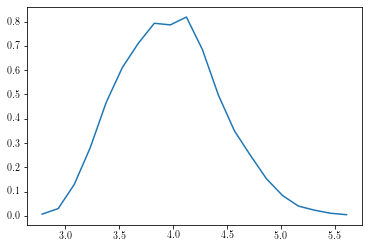

In [19]:
plt.plot(smearing_e_test, smearing_test)

In [20]:
def effective_area_func(surface_fluxes, year):
    # Apply the effective area to the simulation and return unsmeared counts
    cross_check_egrid = (eff_dic[year][:, 1] + eff_dic[year][:, 0])/2.
    cross_check_theta = (eff_dic[year][:, 2] + eff_dic[year][:, 3])/2.
    particle_counts = []
    astro_counts = []
    for theta in list(surface_fluxes.keys()):
        surf_counts = surface_fluxes[0][-1]  # should only need to multiply with fluxes
        m_egrid = surface_fluxes[0][0]
        eff_areas = []
        check_angle = (theta - 180.)
        for energy in m_egrid:
            if energy < 1e1:
                eff_areas.append(0.)
            else:
                loge = np.log10(energy)
                idE = np.abs(cross_check_egrid - loge).argmin()
                all_near = (np.where(cross_check_egrid == cross_check_egrid[idE])[0])
                idTheta = np.abs(cross_check_theta[all_near] - check_angle).argmin()
                eff_areas.append(eff_dic[year][all_near, -1][idTheta])
        loc_eff_area = np.array(eff_areas)
        unsmeared_atmos_counts = surf_counts * loc_eff_area * uptime_tot_dic[year] * surface_fluxes[theta][1] * 2. * np.pi
        unsmeared_astro_counts = (
            astro_flux(m_egrid) * loc_eff_area * surface_fluxes[theta][1] * uptime_tot_dic[year] * 2. * np.pi
        )
        particle_counts.append(unsmeared_atmos_counts)
        astro_counts.append(unsmeared_astro_counts)
    return np.array(particle_counts), np.array(astro_counts), m_egrid

[]

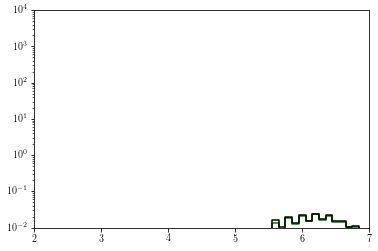

In [21]:
# Checking eff area
check_year = 0
particle_counts, astro_counts, m_egrid = effective_area_func(surface_fluxes, check_year)
particle_counts = np.trapz(particle_counts, x=list(surface_fluxes.keys()), axis=0)
astro_counts = np.trapz(astro_counts, x=list(surface_fluxes.keys()), axis=0)
plt.step(np.log10(m_egrid), particle_counts, color='b')
plt.step(np.log10(m_egrid), astro_counts, color='g')
plt.step(np.log10(m_egrid), (astro_counts + particle_counts), color='k')
plt.xlim(2., 7.)
plt.ylim(1e-2, 1e4)
plt.semilogy()

In [22]:
def sim_to_dec(surface_fluxes, year):
    # Converts simulation data to detector data
    atmos_counts_unsmeared, astro_counts_unsmeared, m_egrid = effective_area_func(surface_fluxes, year)
    log_egrid = np.log10(m_egrid)
    smeared_atmos = []
    smeared_astro = []
    for id_theta, theta in tqdm(enumerate(list(surface_fluxes.keys()))):
        check_angle = (theta - 180.)
        smeared_atmos_loc = []
        smeared_astro_loc = []
        int_grid = []
        for id_check in range(len(log_egrid)):
            smearing_e, smearing = smearing_function(log_egrid[id_check], check_angle, year)
            if len(smearing) < 3:
                continue
            atmos_spl = UnivariateSpline(smearing_e, smearing * atmos_counts_unsmeared[id_theta][id_check],
                                         k=1, s=0, ext=1)
            astro_spl = UnivariateSpline(smearing_e, smearing * astro_counts_unsmeared[id_theta][id_check],
                                         k=1, s=0, ext=1)
            smeared_atmos_loc.append(atmos_spl(log_egrid))
            smeared_astro_loc.append(astro_spl(log_egrid))
            int_grid.append(log_egrid[id_check])
        smeared_atmos.append(np.trapz(smeared_atmos_loc, x=int_grid, axis=0))
        smeared_astro.append(np.trapz(smeared_astro_loc, x=int_grid, axis=0))
    return np.array(smeared_atmos), np.array(smeared_astro), m_egrid

In [23]:
def data_filter(event_dic, energy_range, angle_range, years):
    # filters the data in energy and angle
    filtered_dic = {}
    for year in years:
        # where method is faster as basic slicing
        energy_filter_1 = event_dic[year][np.where(event_dic[year][:, 1] < energy_range[1])]
        energy_filter_2 = energy_filter_1[np.where(energy_filter_1[:, 1] > energy_range[0])]
        high_angle = angle_range[1]
        angle_filter_1 = energy_filter_2[np.where(energy_filter_2[:, 4] < high_angle)]
        low_angle = angle_range[0]
        angle_filter_2 = angle_filter_1[np.where(angle_filter_1[:, 4] > low_angle)]
        filtered_dic[year] = angle_filter_2
    return filtered_dic

In [23]:
# Totals
# Smeared
atmos_all = {}
astro_all = {}
for year in range(10):
    particle_counts_smeared_unin, astro_counts_smeared_unin, m_egrid_smeared = sim_to_dec(surface_fluxes, year)
    particle_counts_smeared = np.trapz(particle_counts_smeared_unin, x=list(surface_fluxes.keys()), axis=0)
    astro_counts_smeared = np.trapz(astro_counts_smeared_unin, x=list(surface_fluxes.keys()), axis=0)
    atmos_all[year] = particle_counts_smeared
    astro_all[year] = astro_counts_smeared

0it [00:00, ?it/s]C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
9it [00:23,  2.56s/it]

KeyboardInterrupt: 

In [ ]:
filtered_data = data_filter(event_dic, [0., 9.], [0., 90.], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
total_data, _ = np.histogram(filtered_data[0][:, 1], bins=np.log10(surface_fluxes[85][2]))
total_atmos = atmos_all[0]
total_astro = astro_all[0]
for year in range(10):
    if year == 0:
        continue
    tmp, _ = np.histogram(filtered_data[year][:, 1], bins=np.log10(surface_fluxes[85][2]))
    total_data += tmp
    total_atmos += atmos_all[year]
    total_astro += astro_all[year]

In [ ]:
total_data

In [26]:
# Fitting
fit_range_low = 51
fit_range_high = 72
def background_fit(norm_atmos, norm_astro, shift_atmos, shift_astro):
    spl_atmos = UnivariateSpline(np.log10(m_egrid) + shift_atmos,
                                 total_atmos * norm_atmos, k=1, s=0)
    spl_astro = UnivariateSpline(np.log10(m_egrid) + shift_astro,
                                 total_astro * norm_astro, k=1, s=0)
    return np.abs(spl_atmos(np.log10(m_egrid)) + spl_astro(np.log10(m_egrid)))
sigma_y = np.ones_like(m_egrid)[fit_range_low:fit_range_high] * 0.2
def LSQ(norm_atmos, norm_astro, shift_atmos, shift_astro):
    ym = background_fit(norm_atmos, norm_astro, shift_atmos, shift_astro)[fit_range_low:fit_range_high]
    res = np.sum((np.log10(total_data[fit_range_low:fit_range_high]+1) -
                  np.log10(ym+1)) ** 2 / sigma_y ** 2)
    return res
m = Minuit(LSQ, 0.5, 0.5, 0.1, 0.1)
m.limits['norm_atmos'] = (0.01, 100.)
m.limits['norm_astro'] = (0.8, 1.2)
m.limits['shift_atmos'] = (-1, 1.)
m.limits['shift_astro'] = (-5, 5.)
m.migrad()

NameError: name 'total_data' is not defined

In [ ]:
# Zoomed
fig, ax = plt.subplots(1, 1,
                       figsize=(std_size, std_size * 6. / 8.),
                       sharex=True,
                       gridspec_kw={'hspace': 0})
ax.errorbar(np.log10(m_egrid), total_data, yerr=np.sqrt(total_data), color='r', ls='none',
            fmt='o', markersize=5, label=r'$\mathrm{Data}$', capsize=5, elinewidth=1)
spl_atmos = UnivariateSpline(np.log10(m_egrid) + m.values[2],
                             total_atmos * m.values[0], k=1, s=0)
spl_astro = UnivariateSpline(np.log10(m_egrid) + m.values[3],
                             total_astro * m.values[1], k=1, s=0)
ax.step(np.log10(m_egrid), spl_atmos(np.log10(m_egrid)), color='b',
        where='mid', label=r'$\mathrm{Atmos}$')
ax.step(np.log10(m_egrid), spl_astro(np.log10(m_egrid)), color='g', where='mid', label=r'$\mathrm{Astro}$')
ax.step(np.log10(m_egrid), spl_atmos(np.log10(m_egrid)) + spl_astro(np.log10(m_egrid)), color='k',
        where='mid', label=r'$\mathrm{Total}$')
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$E_\mathrm{reco}\;\left[\mathrm{{GeV}}\right]$',
              fontsize=fontsize)
ax.set_ylabel(r'$\mathrm{Counts},\;\theta\in \left[0^\circ, 90^\circ\right]$',
              fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax.set_xlim(4, 6.5)
ax.set_ylim(1e-1, 1e3)
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.65, +1.05),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.show()
# fig.savefig("C:\\Users\\steph\\Documents\\PhD\\anti_proton\\pics\\Papers\\Zoomed_Data_benchmark.png",
#             bbox_inches='tight')
# Not zoomed
fig, ax = plt.subplots(1, 1,
                       figsize=(std_size, std_size * 6. / 8.),
                       sharex=True,
                       gridspec_kw={'hspace': 0})
ax.errorbar(np.log10(m_egrid), total_data, yerr=np.sqrt(total_data), color='r', ls='none',
            fmt='o', markersize=5, label=r'$\mathrm{Data}$', capsize=5, elinewidth=1)
ax.step(np.log10(m_egrid), spl_atmos(np.log10(m_egrid)), color='b',
        where='mid', label=r'$\mathrm{Atmos}$')
ax.step(np.log10(m_egrid), spl_astro(np.log10(m_egrid)), color='g', where='mid', label=r'$\mathrm{Astro}$')
ax.step(np.log10(m_egrid), spl_atmos(np.log10(m_egrid)) + spl_astro(np.log10(m_egrid)), color='k',
        where='mid', label=r'$\mathrm{Total}$')
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$E_\mathrm{reco}\;\left[\mathrm{{GeV}}\right]$',
              fontsize=fontsize)
ax.set_ylabel(r'$\mathrm{Counts},\;\theta\in \left[0^\circ, 90^\circ\right]$',
              fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax.set_xlim(2, 6.5)
ax.set_ylim(1e0, 1e7)
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.65, +1.05),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.show()
# fig.savefig("C:\\Users\\steph\\Documents\\PhD\\anti_proton\\pics\\Papers\\Data_benchmark.png",
#             bbox_inches='tight')

In [ ]:
pickle.dump([np.log10(m_egrid), m.values, total_data,
             spl_astro(np.log10(m_egrid)), spl_atmos(np.log10(m_egrid))], open("simulated_data_bkgrd_store_bckgrd_benchmark.p", "wb"))

In [31]:
def LSQ():
    return None
bkgrd_arch = pickle.load(open("simulated_data_bkgrd_store_v2.p", "rb"))
log_egrid = bkgrd_arch[0]
fit_vals = bkgrd_arch[1]
total_data = bkgrd_arch[2]
total_astro = bkgrd_arch[3]
total_atmos = bkgrd_arch[4]
# Shifted best fit background
# total_fitted_atmos = UnivariateSpline(np.log10(m_egrid) + fit_vals[1],
#                                       total_atmos * fit_vals[0], k=1, s=0, ext=1)(np.log10(m_egrid))
# total_fitted_astro = UnivariateSpline(np.log10(m_egrid) + fit_vals[1], total_astro,
#                                       k=1, s=0, ext=1)(np.log10(m_egrid))
total_fitted_atmos = total_atmos
total_fitted_astro = total_astro

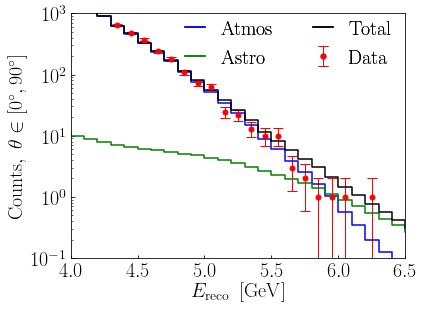

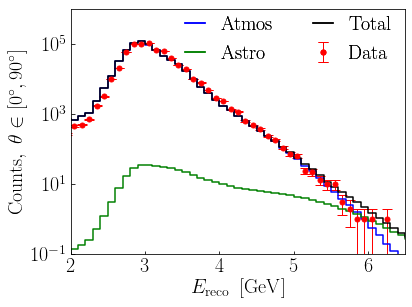

In [35]:
# Zoomed
fig, ax = plt.subplots(1, 1,
                       figsize=(std_size, std_size * 6. / 8.),
                       sharex=True,
                       gridspec_kw={'hspace': 0})
ax.errorbar(np.log10(m_egrid), total_data, yerr=np.sqrt(total_data), color='r', ls='none',
            fmt='o', markersize=5, label=r'$\mathrm{Data}$', capsize=5, elinewidth=1)
ax.step(np.log10(m_egrid), total_fitted_atmos, color='b',
        where='mid', label=r'$\mathrm{Atmos}$')
ax.step(np.log10(m_egrid), total_fitted_astro, color='g', where='mid', label=r'$\mathrm{Astro}$')
ax.step(np.log10(m_egrid), total_fitted_atmos + total_fitted_astro, color='k',
        where='mid', label=r'$\mathrm{Total}$')
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$E_\mathrm{reco}\;\left[\mathrm{{GeV}}\right]$',
              fontsize=fontsize)
ax.set_ylabel(r'$\mathrm{Counts},\;\theta\in \left[0^\circ, 90^\circ\right]$',
              fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax.set_xlim(4, 6.5)
ax.set_ylim(1e-1, 1e3)
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.65, +1.05),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.show()
# fig.savefig("C:\\Users\\steph\\Documents\\PhD\\anti_proton\\pics\\Papers\\Zoomed_Data_benchmark.png",
#             bbox_inches='tight')
# Not zoomed
fig, ax = plt.subplots(1, 1,
                       figsize=(std_size, std_size * 6. / 8.),
                       sharex=True,
                       gridspec_kw={'hspace': 0})
ax.errorbar(np.log10(m_egrid), total_data, yerr=np.sqrt(total_data), color='r', ls='none',
            fmt='o', markersize=5, label=r'$\mathrm{Data}$', capsize=5, elinewidth=1)
ax.step(np.log10(m_egrid), total_fitted_atmos, color='b',
        where='mid', label=r'$\mathrm{Atmos}$')
ax.step(np.log10(m_egrid), total_fitted_astro, color='g', where='mid', label=r'$\mathrm{Astro}$')
ax.step(np.log10(m_egrid), total_fitted_atmos + total_fitted_astro, color='k',
        where='mid', label=r'$\mathrm{Total}$')
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlabel(r'$E_\mathrm{reco}\;\left[\mathrm{{GeV}}\right]$',
              fontsize=fontsize)
ax.set_ylabel(r'$\mathrm{Counts},\;\theta\in \left[0^\circ, 90^\circ\right]$',
              fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax.set_xlim(2, 6.5)
ax.set_ylim(1e-1, 1e6)
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.65, +1.05),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.show()
# fig.savefig("C:\\Users\\steph\\Documents\\PhD\\anti_proton\\pics\\Papers\\Data_benchmark.png",
#             bbox_inches='tight')